# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## Identify url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [42]:
# Create lists to hold data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
print("----------------------------")
print(f"Beginning Data Retrieval")
print("----------------------------")

record = 0 
set_number = 1 

for city in cities:   

    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record >= 50:
            record = 1 
            set_number = set_number + 1
        else: 
            record = record + 1 

        print(f"Processing Record {record} of Set {set_number} | {city}.")
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
        time.sleep(1.01)
        
print("----------------------------")
print(f"Data Retrieval Complete")
print("----------------------------")    

----------------------------
Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | luanda.
Processing Record 2 of Set 1 | chenzhou.
Processing Record 3 of Set 1 | portland.
Processing Record 4 of Set 1 | punta arenas.
Processing Record 5 of Set 1 | pangnirtung.
Processing Record 6 of Set 1 | mount gambier.
Processing Record 7 of Set 1 | mar del plata.
Processing Record 8 of Set 1 | hami.
Processing Record 9 of Set 1 | rikitea.
Processing Record 10 of Set 1 | cape town.
Processing Record 11 of Set 1 | mandera.
Processing Record 12 of Set 1 | qaqortoq.
Processing Record 13 of Set 1 | lavrentiya.
Processing Record 14 of Set 1 | launceston.
Processing Record 15 of Set 1 | port lincoln.
Processing Record 16 of Set 1 | jamestown.
Processing Record 17 of Set 1 | butaritari.
Processing Record 18 of Set 1 | ancud.
Processing Record 19 of Set 1 | tasiilaq.
Processing Record 20 of Set 1 | ushuaia.
Processing Record 21 of Set 1 | kavaratti.
City not found. Skipping..

Processing Record 32 of Set 4 | port macquarie.
Processing Record 33 of Set 4 | santa maria.
Processing Record 34 of Set 4 | orillia.
Processing Record 35 of Set 4 | sumter.
Processing Record 36 of Set 4 | ilulissat.
Processing Record 37 of Set 4 | aksarka.
Processing Record 38 of Set 4 | simao.
Processing Record 39 of Set 4 | samarai.
Processing Record 40 of Set 4 | mount barker.
Processing Record 41 of Set 4 | chuy.
Processing Record 42 of Set 4 | fairbanks.
Processing Record 43 of Set 4 | srednekolymsk.
Processing Record 44 of Set 4 | haysville.
Processing Record 45 of Set 4 | saint george.
Processing Record 46 of Set 4 | namibe.
Processing Record 47 of Set 4 | punto fijo.
Processing Record 48 of Set 4 | saint-philippe.
Processing Record 49 of Set 4 | buala.
Processing Record 50 of Set 4 | coxim.
Processing Record 1 of Set 5 | radomsko.
Processing Record 2 of Set 5 | naryan-mar.
Processing Record 3 of Set 5 | lompoc.
Processing Record 4 of Set 5 | ituacu.
Processing Record 5 of Set 

Processing Record 16 of Set 8 | baruun-urt.
Processing Record 17 of Set 8 | kardasova recice.
Processing Record 18 of Set 8 | dorado.
Processing Record 19 of Set 8 | ambon.
Processing Record 20 of Set 8 | arrecife.
Processing Record 21 of Set 8 | vardo.
Processing Record 22 of Set 8 | lisakovsk.
Processing Record 23 of Set 8 | zhigansk.
Processing Record 24 of Set 8 | trairi.
Processing Record 25 of Set 8 | ixtapa.
City not found. Skipping...
Processing Record 26 of Set 8 | bay roberts.
Processing Record 27 of Set 8 | baykalsk.
Processing Record 28 of Set 8 | sarh.
Processing Record 29 of Set 8 | tendukheda.
City not found. Skipping...
Processing Record 30 of Set 8 | christchurch.
Processing Record 31 of Set 8 | aksu.
City not found. Skipping...
Processing Record 32 of Set 8 | guanica.
Processing Record 33 of Set 8 | taitung.
Processing Record 34 of Set 8 | krasnoselkup.
Processing Record 35 of Set 8 | najran.
Processing Record 36 of Set 8 | krapivinskiy.
Processing Record 37 of Set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# Create dataframe
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": max_temp, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness, 
    "Wind Speed": windspeed, 
    "Country": country, 
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0           Luanda  -8.8368   13.2343     77.00        88          75   
1         Chenzhou  25.8000  113.0333     58.64        95         100   
2         Portland  45.5234 -122.6762     57.99        47          75   
3     Punta Arenas -53.1500  -70.9167     51.80        58          40   
4      Pangnirtung  66.1451  -65.7125     17.60        93          90   
..             ...      ...       ...       ...       ...         ...   
541  Alice Springs -23.7000  133.8833     57.20        67          13   
542        Gouyave  12.1646  -61.7296     84.20        74          40   
543           Jalu  29.0331   21.5482     63.01        36           0   
544    Cabadiangan   9.7531  122.4739     77.52        80          91   
545           Khor  47.8861  134.9464     31.57        61          39   

     Wind Speed Country        Date  
0          5.75      AO  1618000782  
1          1.23      CN  1618000783  
2          4.61      US  1618000785  
3         11.50      CL  1618000786  
4          9.22      CA  1618000787  
..          ...     ...         ...  
541        4.61      AU  1618001535  
542       23.02      GD  1618001536  
543       20.11      LY  1618001537  
544        4.92      PH  1618001539  
545        5.86      RU  1618001541  

[546 rows x 9 columns]

In [44]:
# Describe data
weather_data.describe()

Lat         Lng    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  546.000000  546.000000  546.000000  546.000000  546.000000  546.000000   
mean    19.103904   23.829421   58.773974   69.890110   56.349817    8.351007   
std     33.332660   90.265900   24.256491   22.480875   39.423092    6.110964   
min    -54.800000 -175.200000  -24.650000    5.000000    0.000000    0.510000   
25%     -8.079350  -56.137700   46.000000   57.250000   20.000000    3.870000   
50%     22.311950   25.150750   64.400000   74.500000   74.000000    6.900000   
75%     47.574950  102.500000   77.992500   88.000000   98.000000   11.500000   
max     78.218600  178.416700  110.460000  100.000000  100.000000   55.990000   

               Date  
count  5.460000e+02  
mean   1.618001e+09  
std    2.375199e+02  
min    1.618001e+09  
25%    1.618001e+09  
50%    1.618001e+09  
75%    1.618001e+09  
max    1.618002e+09

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

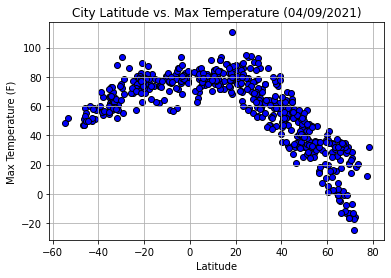

In [79]:
converted_weather_data_df = pd.to_datetime(weather_data['Date'], unit='s').dt.strftime('%m/%d/%Y')

x_axis = weather_data["Lat"]
data = weather_data["Max Temp"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#plt.savefig("../Images/Lat_temp.png")


## Latitude vs. Humidity Plot

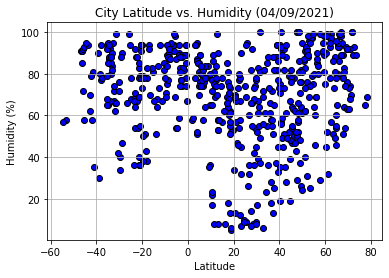

In [78]:
x_axis = weather_data["Lat"]
data = weather_data["Humidity"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#plt.savefig("../Images/Humidity.png")

## Latitude vs. Cloudiness Plot

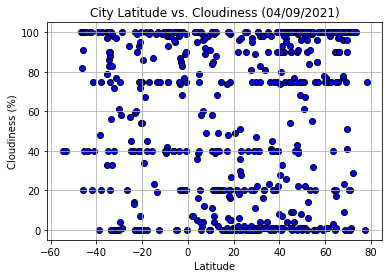

In [80]:
x_axis = weather_data["Lat"]
data = weather_data["Cloudiness"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

#plt.savefig("../Images/Humidity.png")

## Latitude vs. Wind Speed Plot

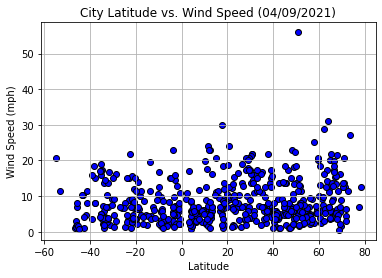

In [81]:
x_axis = weather_data["Lat"]
data = weather_data["Wind Speed"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

#plt.savefig("../Images/Humidity.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


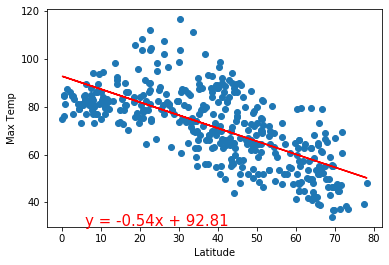

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


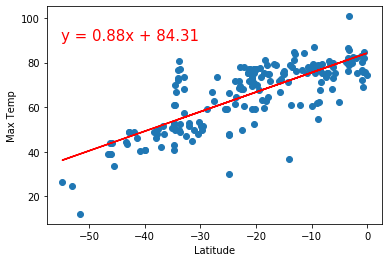

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


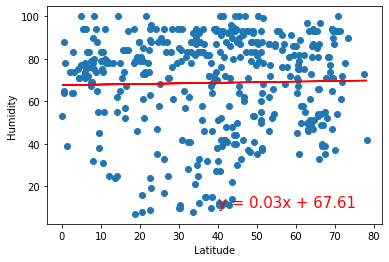

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


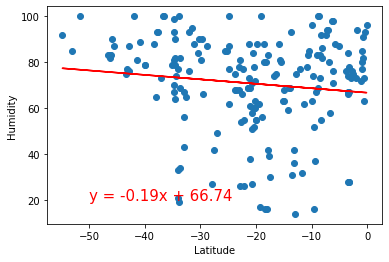

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


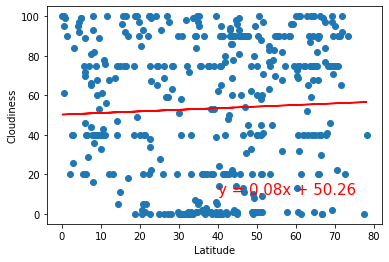

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


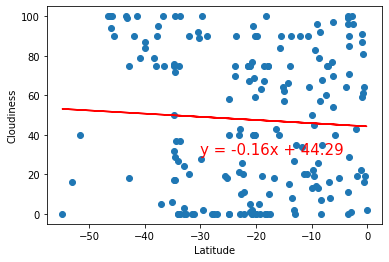

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


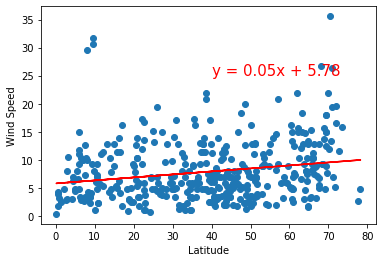

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


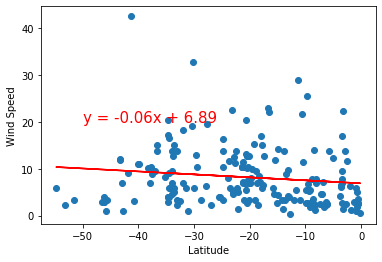